# Assumptions of Linear Regression for Real Estate Data in Python

## Importing required libraries

In [177]:
# Libraries for data manipulation and scientific computing
import pandas as pd
import numpy as np

# Libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Libraries for model building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Library for stat model
import statsmodels.api as sm

# Library for checking multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

## Importing data and fitting the model

In [178]:
df = pd.read_csv("D:\\College Materials\\Sem3\\Machine Learning\\Datasets\\real_estate.csv")
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [179]:
final_df = df.rename(columns={'X2 house age':'house_age', 'X3 distance to the nearest MRT station':'station_distance', 'X4 number of convenience stores':'num_of_stores', 'Y house price of unit area':'house_price'})[['house_age', 'station_distance', 'num_of_stores', 'house_price']]

In [180]:
X = final_df.iloc[:, :-1]
Y = final_df.iloc[:, -1]

# Defining the modell
X = sm.add_constant(X)
model = sm.OLS(Y, X)

# Fitting the model
result = model.fit()

# Printing the model summary
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:            house_price   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.538
Method:                 Least Squares   F-statistic:                     161.1
Date:                Sat, 27 Aug 2022   Prob (F-statistic):           5.44e-69
Time:                        14:45:30   Log-Likelihood:                -1506.5
No. Observations:                 414   AIC:                             3021.
Df Residuals:                     410   BIC:                             3037.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               42.9773      1.385  

## Assumption - 1 : Linear Relationship

<AxesSubplot:title={'center':'Number_of_stores and House_price Relationship'}, xlabel='num_of_stores', ylabel='house_price'>

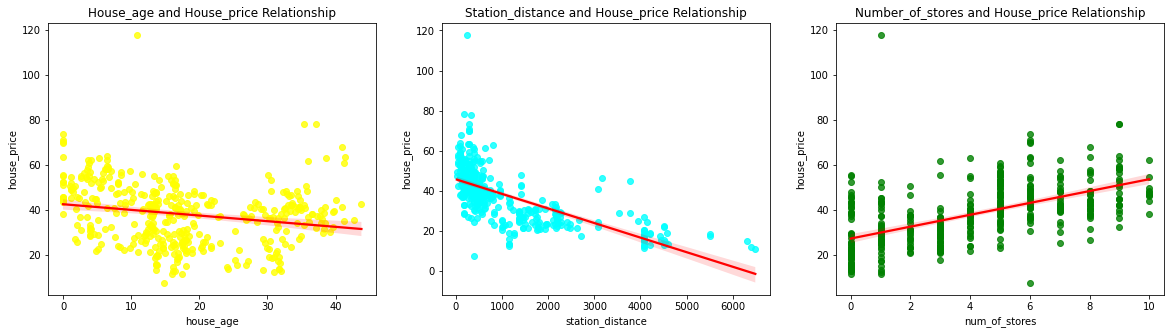

In [181]:
plt.rcParams["figure.figsize"] = (20,5)

plt.subplot(1, 3, 1)
plt.title("House_age and House_price Relationship")
sns.regplot(X['house_age'], Y, scatter_kws={"color": "yellow"}, line_kws={"color": "red"})

plt.subplot(1, 3, 2)
plt.title("Station_distance and House_price Relationship")
sns.regplot(X['station_distance'], Y, scatter_kws={"color": "cyan"}, line_kws={"color": "red"})

plt.subplot(1, 3, 3)
plt.title("Number_of_stores and House_price Relationship")
sns.regplot(X['num_of_stores'], Y, scatter_kws={"color": "green"}, line_kws={"color": "red"})

Linearity check condition has been satisfied since the house_age, station_distance and number_of_stores are linearly correlated 
with house_price which means change in value of any independent feature will impact the response variable (ie. house price) 

## Assumption 2: No or Less Multicollinearity

Formula to calculate variance inflation factor

$$
  VIF = 1/(1 - r^2) = 1/Tolerance 
$$

In [182]:
def calculate_vif(dataset):
    vif = pd.DataFrame()
    vif['features']=dataset.columns
    vif["vif_value"]=[variance_inflation_factor(dataset.values, i) for i in range(dataset.shape[1])]
    return vif

In [183]:
features = final_df.iloc[:, :-1]
calculate_vif(features)

,features,vif_value
0,house_age,2.775991
1,station_distance,1.525476
2,num_of_stores,2.050093


Most research papers consider a VIF (Variance Inflation Factor) > 10 as an indicator of multicollinearity. In our case we can find all VIF value less than 10 which obviously means that our data has no multicollinearity 

## Assumption 3: Homoskedasticity - Constant Variance

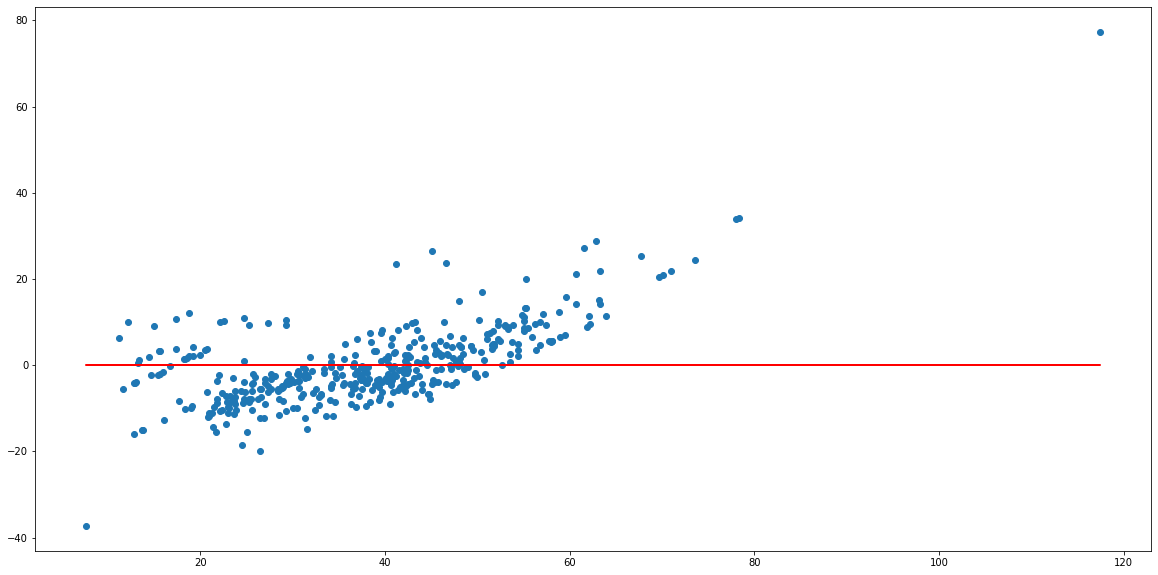

In [184]:
residuals = result.resid
plt.rcParams['figure.figsize']=(20, 10)
plt.scatter(Y, residuals)
plt.plot(Y, [0]*len(Y), color='red')

The residuals are not in any specific pattern and are in range from -20 to +20. Hence the data is homoskedastic or follows a 
constant variance

## Assumption 4 : No Autocorrelation of errors

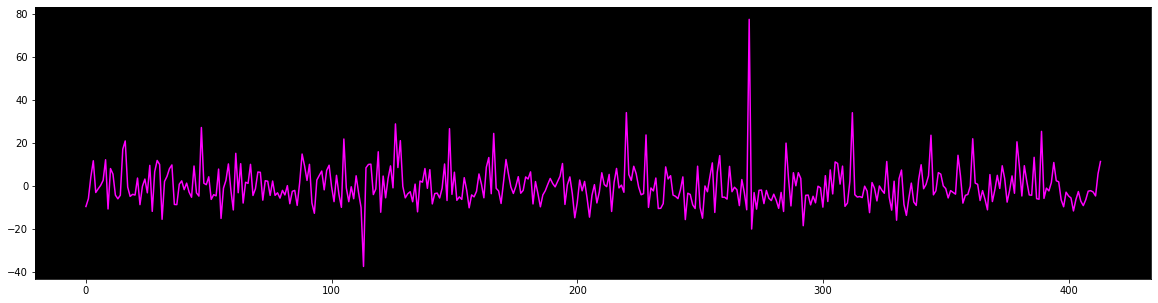

In [191]:
plt.rcParams['axes.facecolor'] = 'black'
plt.plot(residuals.index, residuals.values, color='magenta')

We can infer that there is no Auto correlation among the errors

## Assumption 5: Residual Normality

<AxesSubplot:ylabel='Density'>

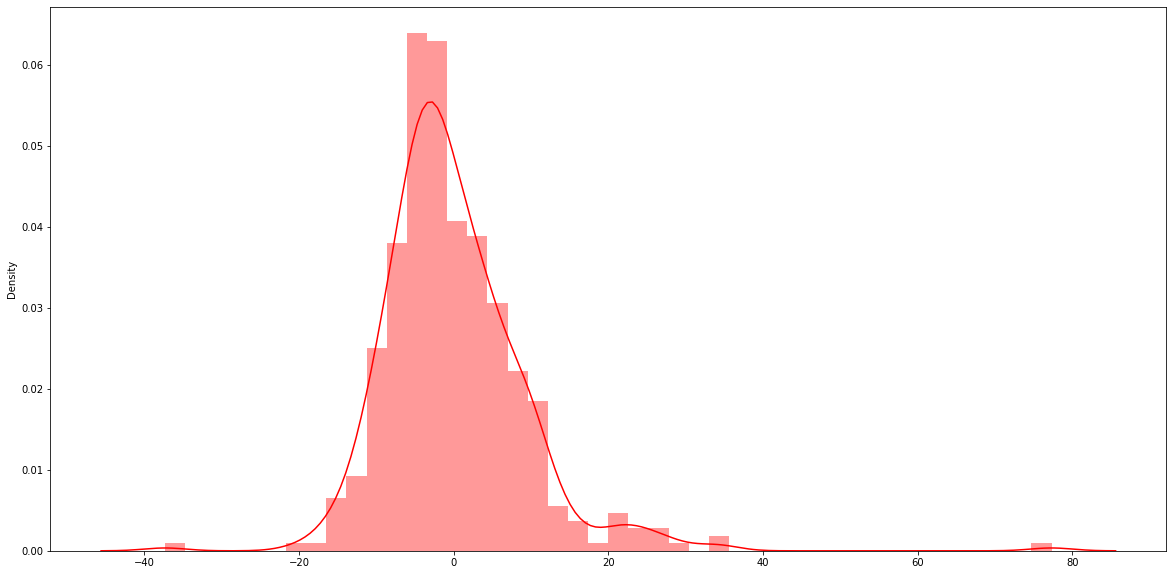

In [186]:
sns.distplot(residuals, color='red')

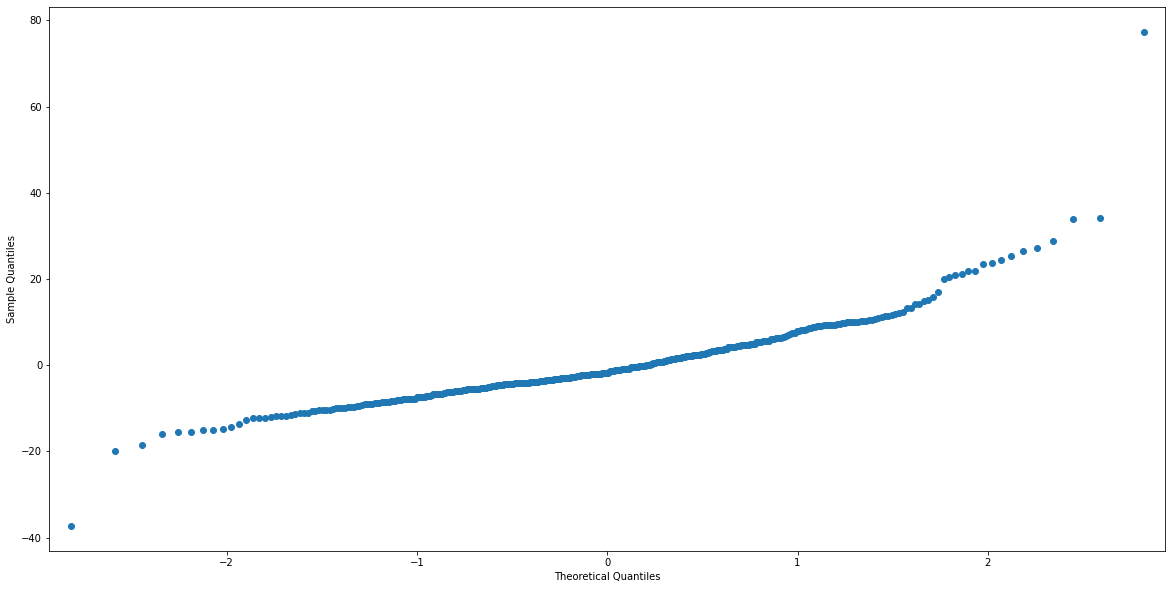

In [187]:
sm.qqplot(residuals)
plt.show()

In [189]:
np.mean(residuals)

# Mean of residual is close to 0

-2.2486789671325683e-13

From the qqplot and histplot we can infer that the errors are normally distributed

## Assumption 6 : Residual relation with independent variables 

<AxesSubplot:title={'center':'Number_of_stores and Residual Relationship'}, xlabel='num_of_stores'>

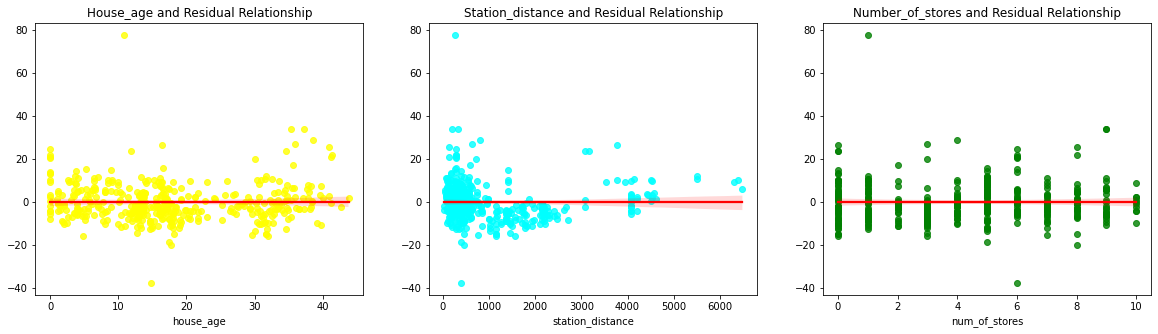

In [190]:
plt.rcParams["figure.figsize"] = (20,5)

plt.subplot(1, 3, 1)
plt.title("House_age and Residual Relationship")
sns.regplot(X['house_age'], residuals, scatter_kws={"color": "yellow"}, line_kws={"color": "red"})

plt.subplot(1, 3, 2)
plt.title("Station_distance and Residual Relationship")
sns.regplot(X['station_distance'], residuals, scatter_kws={"color": "cyan"}, line_kws={"color": "red"})

plt.subplot(1, 3, 3)
plt.title("Number_of_stores and Residual Relationship")
sns.regplot(X['num_of_stores'], residuals, scatter_kws={"color": "green"}, line_kws={"color": "red"})

Residuals are not related to any of the independent variables, and also the residual does not form a pattern with independent varibles 

<i>Satisfying these assumptions we are good to go for model creation</i>